In [ ]:
%matplotlib inline 
import warnings  

In [ ]:

import sys 
import numpy as np 
from scipy.stats import randint
import pandas as pd 
from matplotlib import pyplot
import seaborn as sns 



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

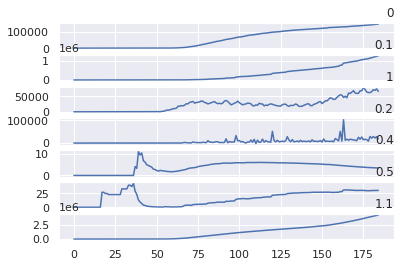

In [ ]:
# load dataset
dataset = pd.read_csv('final_dataset.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=1, loc='right')
	i += 1
pyplot.show()

In [ ]:
dataset.head(10)

,0,0.1,1,0.2,0.3,0.4,0.5,1.1
1/22/20,,,,,,,,
1/23/20,0,0,0,0,0,0.0,0.0,1
1/24/20,0,0,1,0,0,0.0,0.0,2
1/25/20,0,0,0,0,0,0.0,0.0,2
1/26/20,0,0,3,0,0,0.0,0.0,5
1/27/20,0,0,0,0,0,0.0,0.0,5
1/28/20,0,0,0,0,0,0.0,0.0,5
1/29/20,0,0,0,0,0,0.0,0.0,5
1/30/20,0,0,0,0,0,0.0,0.0,5
1/31/20,0,0,2,0,0,0.0,0.0,7


In [ ]:
dataset.isna().sum()

0      0
0.1    0
1      0
0.2    0
0.3    0
0.4    0
0.5    0
1.1    0
dtype: int64

In [ ]:
dataset.shape

(185, 8)

In [ ]:
input_file="final_dataset.csv"

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
# np.random.seed(5)

# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

# take cases columns
all_y = df[8].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 20% test data, 80% training data
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 12
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:
trainX.shape

(135, 12)

In [ ]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network, optimizer=adam, 64 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(64,activation='tanh', input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=500, validation_data=(testX,testY), batch_size=240, verbose=1)



Train on 135 samples, validate on 25 samples
Epoch 1/500
135/135 [==============================] - 0s 3ms/step - loss: 0.0566 - val_loss: 0.5553
Epoch 2/500
135/135 [==============================] - 0s 61us/step - loss: 0.0509 - val_loss: 0.4984
Epoch 3/500
135/135 [==============================] - 0s 51us/step - loss: 0.0435 - val_loss: 0.4480
Epoch 4/500
135/135 [==============================] - 0s 49us/step - loss: 0.0394 - val_loss: 0.3953
Epoch 5/500
135/135 [==============================] - 0s 48us/step - loss: 0.0333 - val_loss: 0.3481
Epoch 6/500
135/135 [==============================] - 0s 36us/step - loss: 0.0289 - val_loss: 0.3061
Epoch 7/500
135/135 [==============================] - 0s 48us/step - loss: 0.0238 - val_loss: 0.2682
Epoch 8/500
135/135 [==============================] - 0s 57us/step - loss: 0.0203 - val_loss: 0.2323
Epoch 9/500
135/135 [==============================] - 0s 46us/step - loss: 0.0176 - val_loss: 0.1984
Epoch 10/500
135/135 [================

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22760.31 RMSE
Test Score: 369558.98 RMSE


testPrices:
testPredictions:
[[2435600.5]
 [2470476.5]
 [2506946.5]
 [2545143.8]
 [2585022. ]
 [2626152.5]
 [2668713.2]
 [2711290.5]
 [2755378.5]
 [2800036.8]
 [2846429.8]
 [2894761.8]
 [2944611.5]
 [2995397. ]
 [3046997.5]
 [3099688.5]
 [3152190.5]
 [3207962.5]
 [3264030. ]
 [3321538.8]
 [3379409.8]
 [3436835.8]
 [3493735.8]
 [3550642. ]
 [3607855. ]]


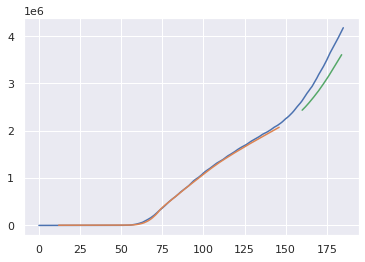

In [ ]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

print('testPredictions:')
print(testPredict)


# plot the actual cases, prediction in test data=red line, actual cases=blue line
plt.plot(testPredictPlot)


testPredictions:
[[2435600.5]
 [2470476.5]
 [2506946.5]
 [2545143.8]
 [2585022. ]
 [2626152.5]
 [2668713.2]
 [2711290.5]
 [2755378.5]
 [2800036.8]
 [2846429.8]
 [2894761.8]
 [2944611.5]
 [2995397. ]
 [3046997.5]
 [3099688.5]
 [3152190.5]
 [3207962.5]
 [3264030. ]
 [3321538.8]
 [3379409.8]
 [3436835.8]
 [3493735.8]
 [3550642. ]
 [3607855. ]]


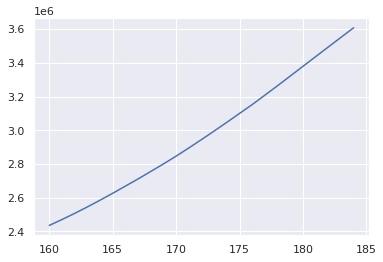

In [ ]:
print('testPredictions:')
print(testPredict)


# plot the actual cases, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()
